# 03 - Exploratory Data Analysis (EDA)

Goals:
- Explore cleaned Netflix Titles dataset.
- Identify key patterns in content type, release trends, genres, countries, and ratings.
- Generate visuals to support dashboards and app.

In [91]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Paths
CLEAN = Path(r"C:\Users\Admibn\OneDrive\Desktop\Netflix Project\netflix-analysis-project\data\cleaned\netflix_titles_clean.csv")

# Load data
df = pd.read_csv(CLEAN)

print("Shape:", df.shape)
df.head(5)

Shape: (8804, 13)


,title,show_id,type,release_year,primary_country,genres_str,rating,date_added,date_added_year,date_added_month,director_primary,cast_primary,metadata
0,Dick Johnson Is Dead,s1,Movie,2020,United States,Documentaries,PG-13,2021-09-25,2021.0,9.0,Kirsten Johnson,NaN,Dick Johnson Is Dead | As her father nears the...
1,Blood & Water,s2,Tv Show,2021,South Africa,International TV Shows|TV Dramas|TV Mysteries,TV-MA,2021-09-24,2021.0,9.0,NaN,Ama Qamata,Blood & Water | After crossing paths at a part...
2,Ganglands,s3,Tv Show,2021,Unknown,Crime TV Shows|International TV Shows|TV Actio...,TV-MA,2021-09-24,2021.0,9.0,Julien Leclercq,Sami Bouajila,Ganglands | To protect his family from a power...
3,Jailbirds New Orleans,s4,Tv Show,2021,Unknown,Docuseries|Reality TV,TV-MA,2021-09-24,2021.0,9.0,NaN,NaN,"Jailbirds New Orleans | Feuds, flirtations and..."
4,Kota Factory,s5,Tv Show,2021,India,International TV Shows|Romantic TV Shows|TV Co...,TV-MA,2021-09-24,2021.0,9.0,NaN,Mayur More,Kota Factory | In a city of coaching centers k...


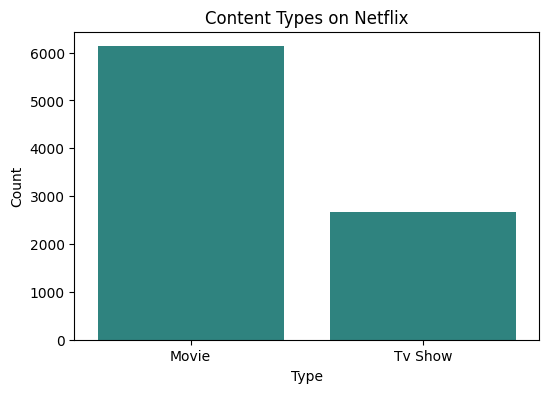

type
Movie      69.616084
Tv Show    30.383916
Name: proportion, dtype: float64

In [92]:
# Count of Movies v/s TV Shows
plt.figure(figsize=(6,4))
# Plot count of content types ordered by frequency
sns.countplot(data=df, x="type", order=df['type'].value_counts().index, palette="viridis", hue=type, legend=False)
plt.title("Content Types on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

df['type'].value_counts(normalize=True) * 100 # Percentage of Movies v/s TV Shows needed for report to show balance in content types

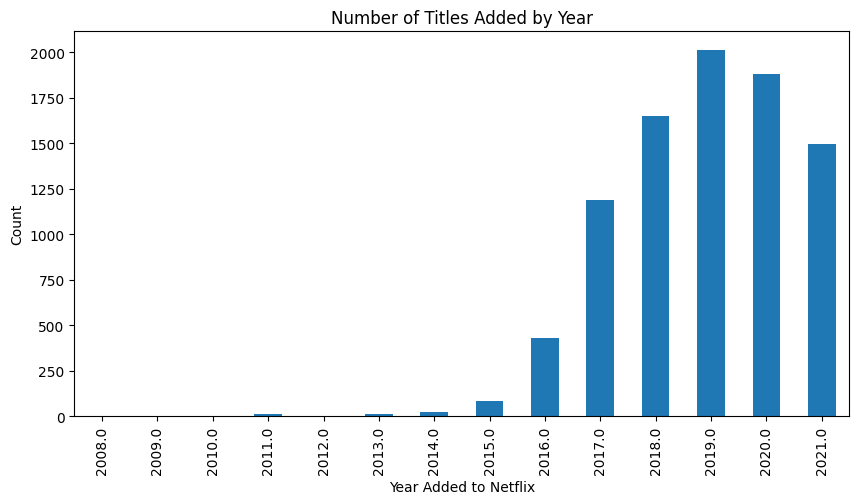

In [93]:
# Titles Added by Year
plt.figure(figsize=(10,5))
df['date_added_year'].value_counts().sort_index().plot(kind='bar') # Bar plot of count of titles added each year
plt.title("Number of Titles Added by Year")
plt.xlabel("Year Added to Netflix")
plt.ylabel("Count")
plt.show()

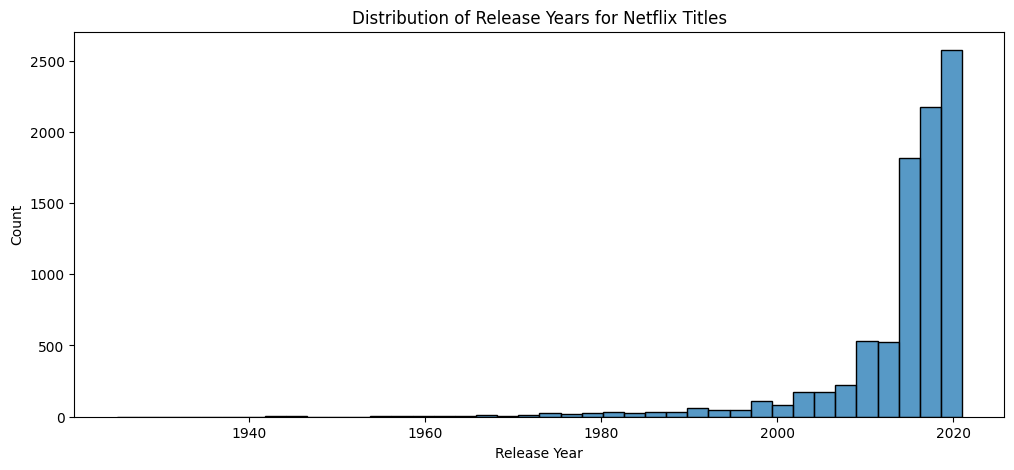

In [94]:
# Distribution of Release Years
plt.figure(figsize=(12,5))
sns.histplot(df['release_year'].dropna(), bins=40, kde=False) # Histogram of release years
plt.title("Distribution of Release Years for Netflix Titles")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

C:\Users\Admibn\AppData\Local\Temp\ipykernel_18716\3204129391.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako") # Horizontal bar plot


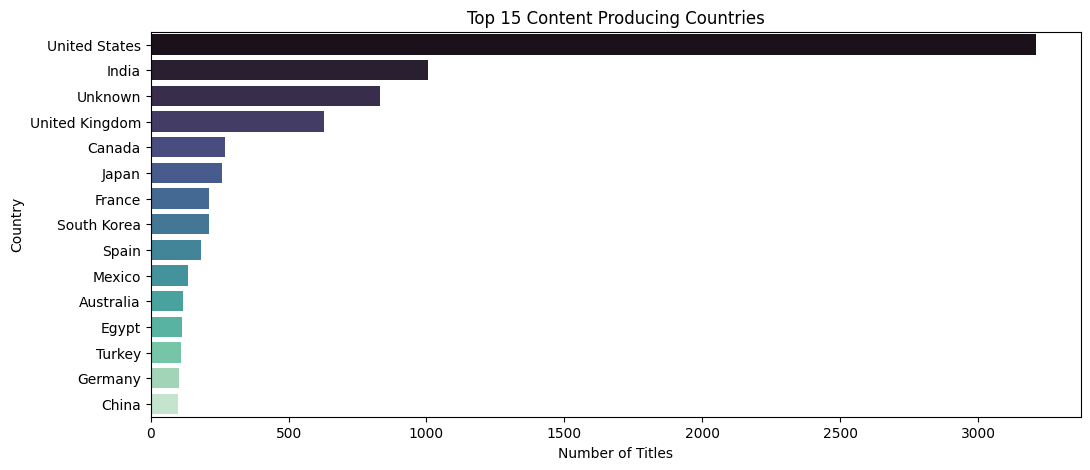

In [95]:
# Top 15 Content Producing Countries
plt.figure(figsize=(12,5))
top_countries = df['primary_country'].value_counts().head(15) # Top 15 countries by number of titles
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako") # Horizontal bar plot
plt.title("Top 15 Content Producing Countries")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

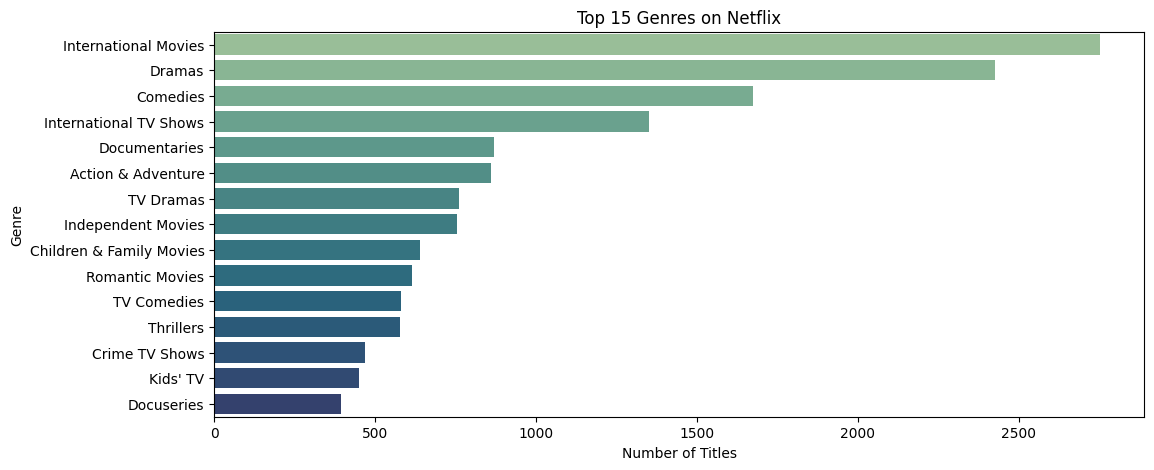

In [96]:
# Top 15 Genres on Netflix (handling pipe-joined genres)
from collections import Counter

# Split pipe-joined genres
# Pipe-joined genres are those that have multiple genres separated by '|'
# We need to split them and count each genre separately
all_genres = df['genres_str'].dropna().str.split('|') # Split genres into lists
flat_genres = [g.strip() for sublist in all_genres for g in sublist if g.strip()] # Flatten the list and remove empty strings

genre_counts = Counter(flat_genres).most_common(15) # Get top 15 genres

genres, counts = zip(*genre_counts) # Unzip into two lists
plt.figure(figsize=(12,5))
sns.barplot(x=list(counts), y=list(genres), palette="crest", hue=list(genres), legend=False) # Horizontal bar plot of top genres listed individually
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

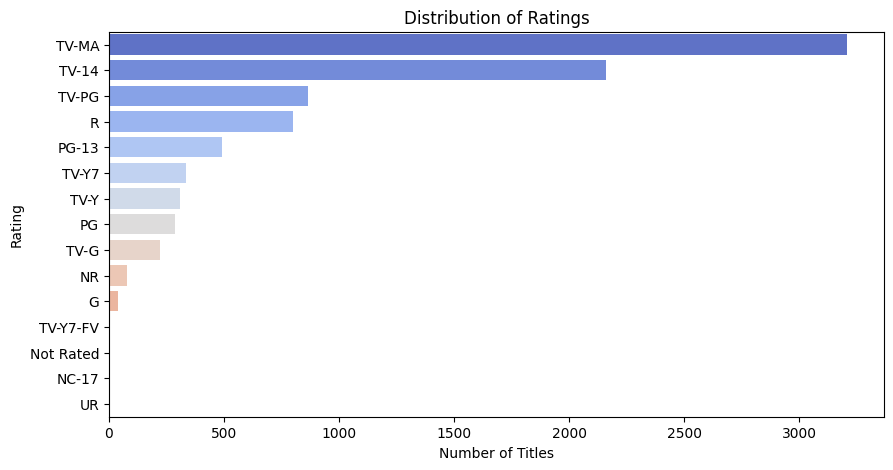

In [97]:
# Distribution of Ratings
plt.figure(figsize=(10,5))
rating_counts = df['rating'].value_counts().head(15) # Top 15 ratings by number of titles
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="coolwarm", hue=rating_counts.index, legend=False) # Horizontal bar plot of ratings by count
plt.title("Distribution of Ratings")
plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.show()

### Key Insights
- Movies dominate Netflix, but TV Shows have grown significantly in recent years.
- The largest wave of new titles was added between ~2015–2020.
- The U.S., India, and the U.K. are the top content producers.
- Popular genres include International Movies, Dramas, and Comedies.
- Ratings skew heavily toward TV-MA, PG-13, and R.